# Random Walks
Byron Adlam

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
from scipy.optimize import curve_fit
import scipy.stats as stats
from math import comb

In [43]:
#movement vectors for walks in different lattice dimensions and structures
vectors_1d = [[1],[-1]] #movement vectors in for random walk in 1d
vectors_2d = [[1,0],[-1,0],[0,1],[0,-1]] #movement vectors in for random walk in 2d
t_vector = np.array([[1,0],[-1,0],[0.5,np.sqrt(3)/2],[-0.5,np.sqrt(3)/2],
                     [-0.5,-np.sqrt(3)/2],[0.5,-np.sqrt(3)/2]]) #movement vectors for a triangular lattice
vectors_3d = [[1,0,0],[-1,0,0],[0,1,0],[0,-1,0],[0,0,1],[0,0,-1]] #movement vectors for walk in 3d
vectors_4d = [[1,0,0,0],[-1,0,0,0],[0,1,0,0],[0,-1,0,0],[0,0,1,0],[0,0,-1,0],[0,0,0,1],[0,0,0,-1]] #movement vectors for walk in 4d
#lattice dimensions
dimension_1d = 1
dimension_2d = 2
dimension_3d = 3
dimension_4d = 4

In [3]:
def random_walk(n_,v):
    '''Function for generating random walk, returns array of random walk values'''
    rng = np.random.default_rng() #generate random numbers
    values = rng.choice(v,n_) #choose a vector movement from v
    return np.cumsum(values,axis=0) #cumulatively sum the vectors to obtain changing positions

1d Random Walk

Text(0, 0.5, 'Position')

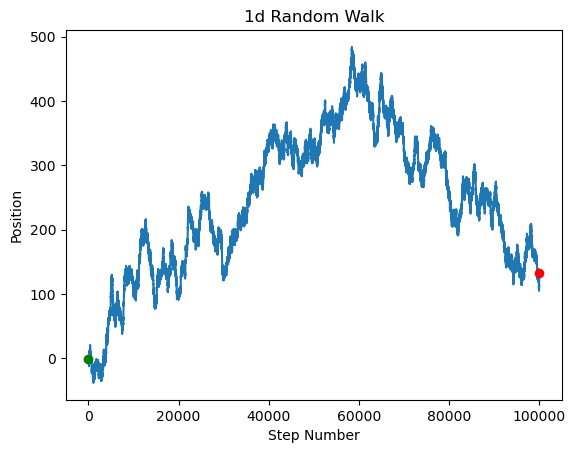

In [4]:
#1d Random Walk
n = 100000 #number of steps

walk = random_walk(n,vectors_1d) #1d walk

plt.figure()
steps = np.arange(n)
plt.plot(steps, walk[:])
plt.plot(steps[0],walk[0],'og', label='Start')
plt.plot(steps[-1],walk[-1],'or', label='Finish')
plt.title('1d Random Walk')
plt.xlabel('Step Number')
plt.ylabel('Position')

2d Random Walk, square lattice

Text(0, 0.5, 'y')

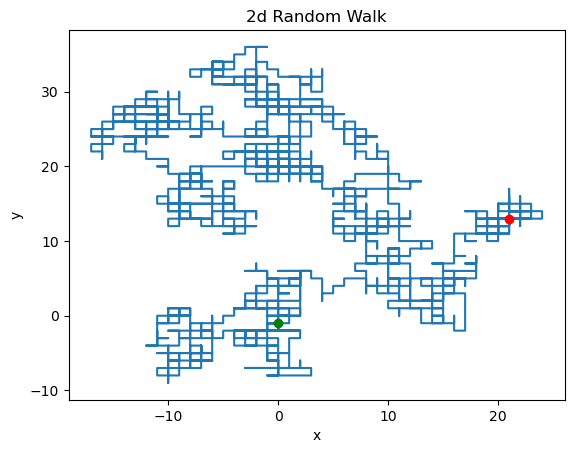

In [5]:
#2d Random Walk on a square lattice
n = 2000
walk = random_walk(n,vectors_2d) #2d walk

plt.figure()
plt.plot(walk[:,0],walk[:,1])
plt.plot(walk[0][0],walk[0][1],'og')
plt.plot(walk[-1][0],walk[-1][1],'or')
plt.title('2d Random Walk')
plt.xlabel('x')
plt.ylabel('y')

In [6]:
#cut walk to correct length for euclid distance calculation

def step_prep(w,steps,dimension):
    '''split walk into sections of length step, returns an array with 
    differences in position'''
    walks = np.concatenate((-w[steps:],np.zeros((steps,dimension)))) #add array of zeros, length step, onto walk
    diff = w[1:] + walks[:-1]
    diff = diff[:-steps] #return difference of walk positions, 'steps' apart
    return diff

@jit(nopython=True)
def euclid_dist(list_difference):
    '''calculate euclidean distance between two points'''
    dists = []
    for i in list_difference:
        dists.append(np.linalg.norm(i))
    return dists

@jit(nopython=True)
def rayleigh_fit(x,steps):
    '''function for calculating the Rayleigh fit'''
    sigma_2 = steps/2
    rayleigh = (x/sigma_2)*np.exp(-x**2/(2*sigma_2)) #rayleigh fit equation
    return rayleigh


# 1d Walk Analysis

In [7]:
#generate walks for distribution of distances
walks = 10000 #number of walks to generate
N = 1000 #walk lengths
origin_dists = []
c = 0 #counter
while c < walks:
    walk = random_walk(N, vectors_1d)
    origin_dists.append(walk[-1][0]) #append final point of random walk (distance from origin)
    c += 1

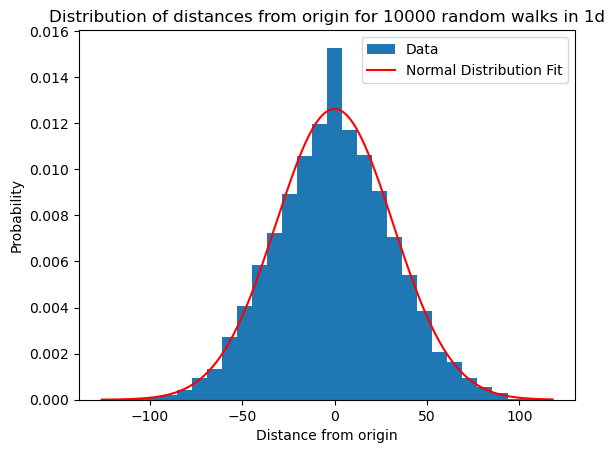

In [8]:
#Plot distribution of distances from origin for 'walks' walkers of length 'N' in 1d and normal fit
max_ = np.max(origin_dists)
min_ = np.min(origin_dists)
plt.hist(origin_dists, density=True, bins=30, label='Data') #plot distribution
x = np.linspace(min_,max_,N) #generate x-axis values for fit
plt.plot(x, stats.norm.pdf(x, scale=np.sqrt(N)), color='r', label='Normal Distribution Fit') #generate normal distribution fit
plt.title(f'Distribution of distances from origin for {walks} random walks in 1d')
plt.xlabel('Distance from origin')
plt.ylabel('Probability')
plt.legend()

# 2d Walk Analysis
square lattice

Variance : 203.5153285676647


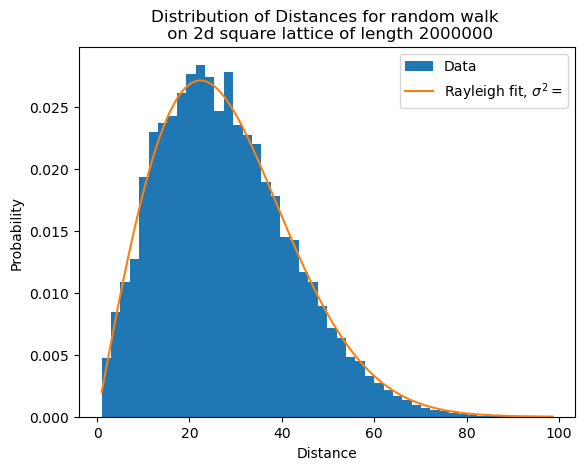

In [9]:
n = 2000000 #number of points to walk for
walk_2d = random_walk(n,vectors_2d) #2d walk

step_size = 1000 #size of the steps to get distances between
dists = euclid_dist(step_prep(walk_2d,step_size, dimension_2d)) #distribution of distances 'step_size' points apart

max_ = np.amax(dists)
min_ = np.amin(dists)
bins = int((max_-min_)/2) #calculating bin-width

x_ = np.linspace(min_,max_,step_size) #x axis values for fit
rayleigh = rayleigh_fit(x_,step_size) #calculating corresponding rayleigh fit

#Plot distribution and Rayleigh fit
plt.figure()
plt.hist(dists, bins, density=True, label = 'Data')
plt.title('Distribution of Distances for random walk \n on 2d square lattice of length 2000000')
plt.xlabel('Distance')
plt.ylabel('Probability')
plt.plot(x_,rayleigh, label = 'Rayleigh fit, $\sigma^2=\frac{N}{2}$')
plt.legend()
print('Variance :', np.var(dists))

In [10]:
def steps_variance(w, start, end, step, dimension):
    '''function for calculating the variances for a distribution of distances 'step' points apart'''
    fits = np.arange(start,end,step) #array of different step lengths
    variances = [np.var(euclid_dist(step_prep(w,i,dimension))) for i in fits] #calculate variances
    return fits, variances

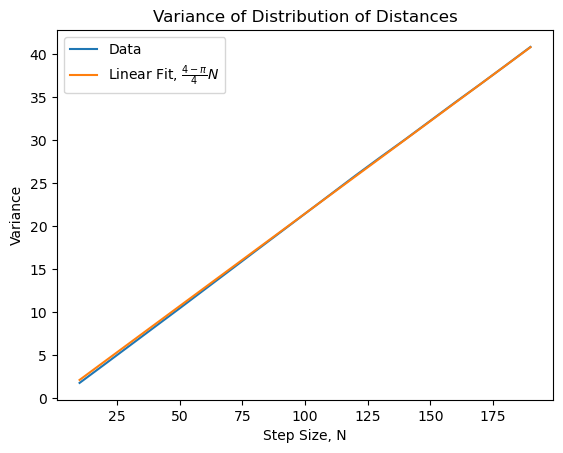

In [11]:
step_vs = steps_variance(walk_2d, 10, 200, 10, dimension_2d) #generate variances
#Plot variance of Distribution of Distances
plt.figure()
plt.plot(step_vs[0],step_vs[1], label='Data')
plt.plot(step_vs[0],((4-np.pi)/4)*step_vs[0], label=r'Linear Fit, $\frac{4-\pi}{4}N$') #Linear fit for variance and step size
plt.title('Variance of Distribution of Distances')
plt.xlabel('Step Size, N')
plt.ylabel('Variance')
plt.legend()

Triangular lattice

(-17.625, 7.125, -0.6495190528383291, 13.63990010960491)

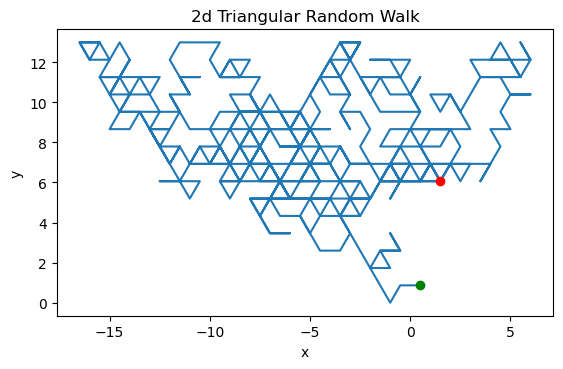

In [12]:
triangle_walk = random_walk(500,t_vector) #generate walk
#plot walk
plt.figure()
plt.plot(triangle_walk[:,0],triangle_walk[:,1])
plt.plot(triangle_walk[0][0],triangle_walk[0][1],'og')
plt.plot(triangle_walk[-1][0],triangle_walk[-1][1],'or')
plt.title('2d Triangular Random Walk')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('scaled')

Variance : 193.22225420823344


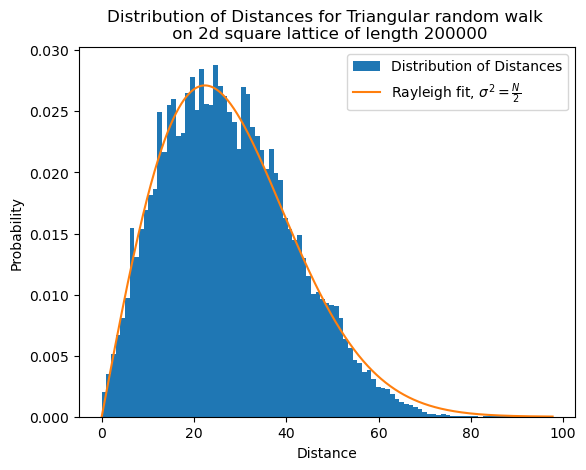

In [13]:
#Distribution of distances for Triangular random walk on square lattice
l = 200000 #random walk length
triangle_walk = random_walk(l,t_vector) #generate long walk
step_size = 1000 #size of steps for distance calculations
dists = euclid_dist(step_prep(triangle_walk,step_size,dimension_2d)) #get distribution of distances

max_ = np.amax(dists)
min_ = np.amin(dists)
bins = int(max_-min_) #calculate bin-width

x_ = np.linspace(min_,max_,step_size)
rayleigh = rayleigh_fit(x_,step_size) #generate rayleigh fit for array of distances

plt.figure()
plt.hist(dists, bins, density=True, label = 'Distribution of Distances')
plt.title(f'Distribution of Distances for Triangular random walk \n on 2d square lattice of length {l}')
plt.xlabel('Distance')
plt.ylabel('Probability')
plt.plot(x_,rayleigh, label = r'Rayleigh fit, $\sigma^2=\frac{N}{2}$')
plt.legend()
print('Variance :', np.var(dists))

Text(0, 0.5, 'Variance')

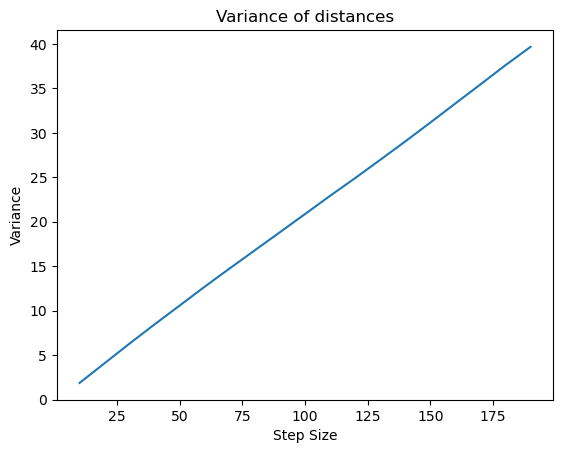

In [14]:
triangle_var = steps_variance(triangle_walk,10,200,10, dimension_2d) #calculate variances
# plot variance of distribution of distances for random walk on triangular lattice
plt.figure()
plt.plot(triangle_var[0],triangle_var[1])
plt.title('Variance of distances')
plt.xlabel('Step Size')
plt.ylabel('Variance')

# Self Avoiding Random Walk

In [15]:
def sarw(v_):
    '''Function for generating Self Avoiding Random Walk, returns array of positions'''
    rng = np.random.default_rng() #generate random number
    positions = np.array([[0,0]]) #initial position
    values = np.array([[0,0]])
    v_=np.array(v_)
    vector_size = len(v_)
    while True:
        vector_index = rng.choice(vector_size,1) #choose index of a vector
        vector_size -= 1
        current_vec = v_[vector_index] #get vector
        v_ = np.delete(v_,vector_index, axis=0) #remove the chosen vector from the available vectors
        values = np.append(v_,current_vec, axis = 0) #add chosen vector
        new_pos = (values[-1] + positions[-1]).reshape(1,2)
        positions = np.append(positions,new_pos, axis = 0) #update position
        
        if np.any(np.all(positions[:-1] == positions[-1], axis=1)): #check if position already visited
            positions = positions[:-1] #remove recently added position
            values = values[:-1] #remove corresponding vector
            if len(v_) == 0: #if no more available vectors to choose from, end algorithm
                break
        else:
            v_ = np.array([[1,0],[-1,0],[0,1],[0,-1]]) #reset availble vectors
            vector_size = len(v_)
    return positions

Generating, attempt  1
Generating, attempt  2
Generating, attempt  3
Generating, attempt  4
Generating, attempt  5
Generating, attempt  6
Generating, attempt  7
Generating, attempt  8
Generating, attempt  9
Generating, attempt  10
Generating, attempt  11
Generating, attempt  12
Generating, attempt  13
Generating, attempt  14
Generating, attempt  15
Generating, attempt  16
Generating, attempt  17
Generating, attempt  18
Generating, attempt  19
Generating, attempt  20
Generating, attempt  21
Generating, attempt  22
Generating, attempt  23
Generating, attempt  24
Generating, attempt  25
Generating, attempt  26
Generating, attempt  27
Generating, attempt  28
Generating, attempt  29
Generating, attempt  30
Generating, attempt  31
Generating, attempt  32
Generating, attempt  33
Generating, attempt  34
Generating, attempt  35
Generating, attempt  36
Generating, attempt  37
Generating, attempt  38
Generating, attempt  39
Generating, attempt  40
Generating, attempt  41
Generating, attempt  42
G

(-24.8, 14.8, -30.85, 9.85)

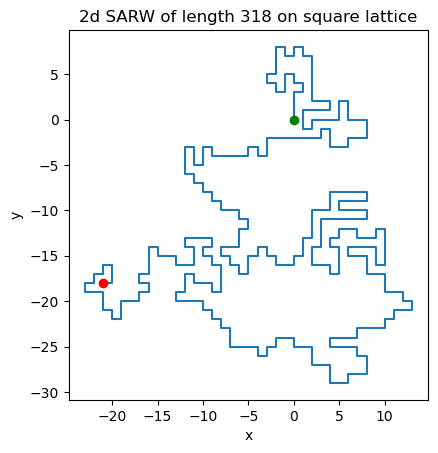

In [16]:
#Generate a 2d SARW of minimum length 300

counter = 0
while True:
    self_avoid_2d = sarw(vectors_2d) #generate sarw
    if len(self_avoid_2d) > 300: #verify length is longer than 300
        sarw_300_length = len(self_avoid_2d)
        print('Length of walk: ', sarw_300_length)
        break
    counter += 1
    print('Generating, attempt ', counter)
plt.figure()
plt.plot(self_avoid_2d[:,0],self_avoid_2d[:,1])
plt.plot(self_avoid_2d[0][0],self_avoid_2d[0][1],'og', label='start')
plt.plot(self_avoid_2d[-1][0],self_avoid_2d[-1][1],'or', label='end')
plt.title(f'2d SARW of length {sarw_300_length} on square lattice')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('scaled')

In [17]:
#Variance of a 2d SARW, note this process will take several minutes

distances = []
lengths = []
sarw_number = 50000 #number of sarw to generate
c = 0
while c < sarw_number: #Generate 50000 SARWs
    
    self_avoid_2d = sarw(vectors_2d) #generate SARW
    length = len(self_avoid_2d) #get length of walk (number of steps)
    lengths.append(length)
    distances.append(np.linalg.norm(self_avoid_2d[-1])) #Calculate distance of each SARW from origin
    c += 1
    print(f'Loading ... {c} of {sarw_number}')

Loading ... 1 of 50000
Loading ... 2 of 50000
Loading ... 3 of 50000
Loading ... 4 of 50000
Loading ... 5 of 50000
Loading ... 6 of 50000
Loading ... 7 of 50000
Loading ... 8 of 50000
Loading ... 9 of 50000
Loading ... 10 of 50000
Loading ... 11 of 50000
Loading ... 12 of 50000
Loading ... 13 of 50000
Loading ... 14 of 50000
Loading ... 15 of 50000
Loading ... 16 of 50000
Loading ... 17 of 50000
Loading ... 18 of 50000
Loading ... 19 of 50000
Loading ... 20 of 50000
Loading ... 21 of 50000
Loading ... 22 of 50000
Loading ... 23 of 50000
Loading ... 24 of 50000
Loading ... 25 of 50000
Loading ... 26 of 50000
Loading ... 27 of 50000
Loading ... 28 of 50000
Loading ... 29 of 50000
Loading ... 30 of 50000
Loading ... 31 of 50000
Loading ... 32 of 50000
Loading ... 33 of 50000
Loading ... 34 of 50000
Loading ... 35 of 50000
Loading ... 36 of 50000
Loading ... 37 of 50000
Loading ... 38 of 50000
Loading ... 39 of 50000
Loading ... 40 of 50000
Loading ... 41 of 50000
Loading ... 42 of 50000
L

In [18]:
lengths = np.array(lengths)  #convert lengths and distances to numpy arrays
distances = np.array(distances)

steps = np.arange(20, 110) #range of steps to get distribution for
steps_distribution = []
walk_steps_var = []

for step in steps:
    mask = lengths == step #create a boolean mask, where a value of True indicates a match
    step_current = np.array(distances)[mask] #get distances for each step which contain at least one SARW
    
    if len(step_current) >= 20: #filter the steps to have a minimum of 20 data points
        walk_steps_var.append(np.var(step_current)) #calculate variance of distances
        steps_distribution.append(step) #generate range of steps which have a corresponding variance

Fit: 0.03668455371912312x^1.5902364021730802


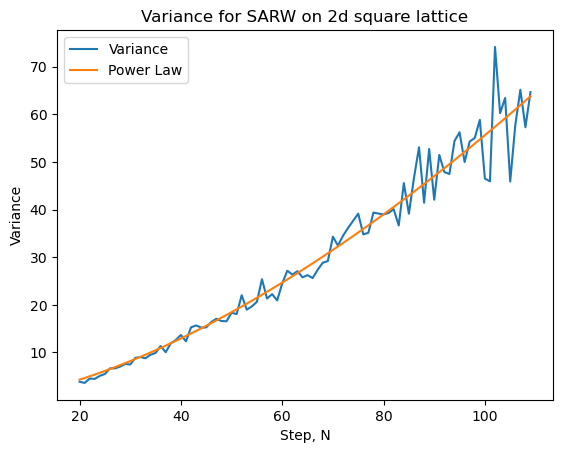

In [19]:
#Fit a power law to the variance plot
plt.plot(steps_distribution,walk_steps_var, label = 'Variance') #plot variance

def power_law(x,a,b):
    '''Function for calculating power law fit'''
    return a*x**b

opt, cov = curve_fit(power_law,steps_distribution,walk_steps_var) #get best fit parameters for power law fit
x,y = np.array(steps_distribution), power_law(np.array(steps_distribution), *opt) #generate power law fit
plt.plot(x,y, label = 'Power Law')

plt.title('Variance for SARW on 2d square lattice')
plt.xlabel('Step, N')
plt.ylabel('Variance')

plt.legend()

print(f"Fit: {opt[0]}x^{opt[1]}")

Most likely trapping step number:  36
Mean number of steps taken before trapping:  72.18456


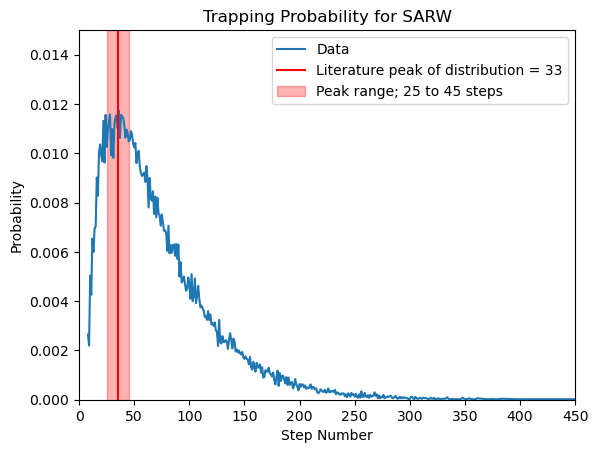

In [20]:
#Trapping Probability for SARW
sarw_num = len(lengths)    
unique_points, point_walk_number = np.unique(lengths,return_counts=True) #get all unique length values, and their corresponding count
trapping_probability = np.divide(point_walk_number,sarw_num) #get probability for each unique_point

#plot probability
plt.figure()
plt.plot(unique_points,trapping_probability, label='Data')
plt.title('Trapping Probability for SARW')
plt.xlabel('Step Number')
plt.ylabel('Probability')
plt.axvline(35, color='r', label='Literature peak of distribution = 33')

max_prob = unique_points[list(trapping_probability).index(np.max(trapping_probability))] #most probable trapping step number
plt.fill_betweenx(np.linspace(0,0.015,50),25,45,color='r', alpha=0.3, label='Peak range; 25 to 45 steps')
plt.xlim(0,450)
plt.ylim(0,0.015)
plt.legend()

print('Most likely trapping step number: ', max_prob)
print('Mean number of steps taken before trapping: ', np.mean(lengths))


# Annihilating Walkers, Base Case:
We begin with two random walkers at origin, and move both every step. If they occupy the same coordinate at the same time, they are annihilated and removed.

The number of annihilations per step scales as N-1, where N is the step number


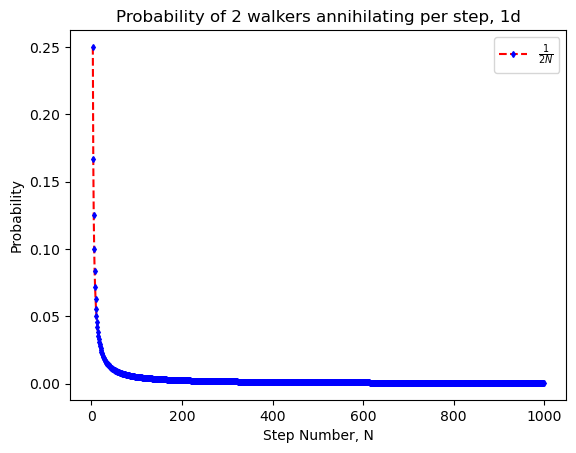

In [55]:
# Enumerate the sample space for two annihilating walkers in 1d, starting at origin

N_steps = np.arange(2,1000) #array of steps

values_list = []
annihilation_probability = {}

def combinations(walker_num):
    '''Function for calculating all possible positional combinations for two walkers at N steps'''
    return 4*comb(walker_num,2)

for n in N_steps:
    annihilations = n-1 #number of annihilations per row
    all_combinations = combinations(n) #total pairs of two walkers for each row
    annihilation_probability[n] = np.divide(annihilations,all_combinations) #probability of two walkers annihilating

plt.plot(N_steps[1:],list(annihilation_probability.values())[:-1], color='r', linestyle='--', marker='d', mec='b', mfc='b', markersize=3, label=r'$\frac{1}{2N}$')
plt.title('Probability of 2 walkers annihilating per step, 1d')
plt.xlabel('Step Number, N')
plt.ylabel('Probability')
plt.legend()

print('The number of annihilations per step scales as N-1, where N is the step number')

We now run simulations of the base case to see how real data compares.

In [22]:
def annihilating_walk(num_simulations,step_num,v_,walker_nums_to_add,start_walkers,dimension):
    '''Function for creating a random walker at point origin every step up to step_num steps, until walker_numbers is reached'''
    
    simulation_walk_numbers = [] #number of walkers per step per simulation
    steps_travel = [] #steps travelled by the walkers
    
    for sim in range(num_simulations): #loop through simulations
        
        
        walkers = start_walkers.copy() #get starting walkers
        walker_number = []
        completed_walkers = []
        
        for n in range(step_num):
            rng = np.random.default_rng() #generate random numbers to choose a vector
            current_walkers = 0
            
            for key,val in walkers.items():
                new_pos = rng.choice(v_).reshape(1,dimension) #choose a vector randomly
                walkers[key] = np.append(val,val[-1] + new_pos,axis=0) #add chosen vector
                current_walkers += 1
                
            
            #get final position for each, and then compare those and get index of identical positions
            final_positions = [x[-1] for x in walkers.values()] #get final position of each walker
            keys = list(walkers.keys())
            
            a,i,c = np.unique(final_positions, return_index=True, return_counts=True, axis = 0) #gets number of times vector appears for each index
            ak,ck = np.unique(keys, return_counts=True, axis = 0)
            to_keep = i[c%2==1] #list of indices of final positions to be kept
            ak = ak[ck%2==1] #corresponding list of walkers.keys()
        
            if len(to_keep)<len(walkers): #look for annihilated walkers
                for x in range(len(walkers)):
                    if x not in to_keep:
                        completed_walkers.append(walkers[ak[x]])
                        del walkers[ak[x]] #remove annihilated walkers
        
            if current_walkers == 0: #for two walkers base case, stop simulation if no more walkers exist
                break
            
            if current_walkers < walker_nums_to_add:
                walker = np.array(list(start_walkers.values())[0])
                walkers[(n+1)] = walker #add a new walker at origin
                current_walkers += 1
            walker_number.append(current_walkers)
            
        #get number of steps walkers have travelled, assuming they have annihilated
        if n < step_num - 1:
            steps_travel.append(n)
  
        simulation_walk_numbers.append(walker_number)
        
        print(f'Loading... {sim} of {num_simulations}')
        
    return simulation_walk_numbers, steps_travel

In [23]:
# Run sim_n simulations of two walkers in 1d
sim_n = 10000 #number of simulations
step_n = 1000 #number of steps for walkers to travel
starting_walks = {0:[[0]],1:[[0]]} # two walkers at origin at start
adding_walkers = 1 # not adding any walks after start


two_walk_annihilate_1d = annihilating_walk(sim_n, step_n, vectors_1d, adding_walkers, starting_walks, dimension_1d)

Loading... 0 of 10000
Loading... 1 of 10000
Loading... 2 of 10000
Loading... 3 of 10000
Loading... 4 of 10000
Loading... 5 of 10000
Loading... 6 of 10000
Loading... 7 of 10000
Loading... 8 of 10000
Loading... 9 of 10000
Loading... 10 of 10000
Loading... 11 of 10000
Loading... 12 of 10000
Loading... 13 of 10000
Loading... 14 of 10000
Loading... 15 of 10000
Loading... 16 of 10000
Loading... 17 of 10000
Loading... 18 of 10000
Loading... 19 of 10000
Loading... 20 of 10000
Loading... 21 of 10000
Loading... 22 of 10000
Loading... 23 of 10000
Loading... 24 of 10000
Loading... 25 of 10000
Loading... 26 of 10000
Loading... 27 of 10000
Loading... 28 of 10000
Loading... 29 of 10000
Loading... 30 of 10000
Loading... 31 of 10000
Loading... 32 of 10000
Loading... 33 of 10000
Loading... 34 of 10000
Loading... 35 of 10000
Loading... 36 of 10000
Loading... 37 of 10000
Loading... 38 of 10000
Loading... 39 of 10000
Loading... 40 of 10000
Loading... 41 of 10000
Loading... 42 of 10000
Loading... 43 of 1000

Mean number of steps taken:  18.795725190839693
Variance of number of steps taken:  6077.515218367228


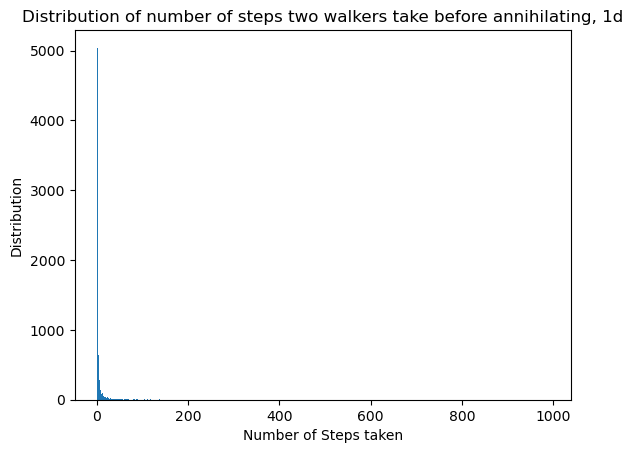

In [24]:
# Number of steps two walkers take before annihilating in 1d

steps_travelled_1d = two_walk_annihilate_1d[1] #number of steps the walker have travelled for each simulation

max_ = max(steps_travelled_1d) #calculating bin_width
min_ = min(steps_travelled_1d)

plt.figure()
plt.hist(steps_travelled_1d, bins = max_ - min_)
plt.title('Distribution of number of steps two walkers take before annihilating, 1d')
plt.xlabel('Number of Steps taken')
plt.ylabel('Distribution')

mean_steps = np.mean(steps_travelled_1d) #mean steps travelled
variance_steps = np.var(steps_travelled_1d) #variance of steps travelled
print('Mean number of steps taken: ', mean_steps)
print('Variance of number of steps taken: ', variance_steps)

In [25]:
# Probability 2 walkers annihilate  per step number

steps = np.arange(1,step_n) #array of steps

steps_plot = []
step_number_distribution = []
annihilating_probability = []
number_of_walkers = [sim_n] #number of simulations with walkers not annihilated per step (initially = number of simulations)

for i in steps:
    step_number = 0
    step_number = np.sum(np.array(steps_travelled_1d) == i) #get number of simulations with length i
    step_number_distribution.append(step_number)
    number_of_walkers.append(number_of_walkers[i-1]-step_number) #number of walkers left over
    if step_number != 0:
        steps_plot.append(i)
        annihilating_probability.append(step_number/number_of_walkers[i-1]) #calculate annihilating probability
        

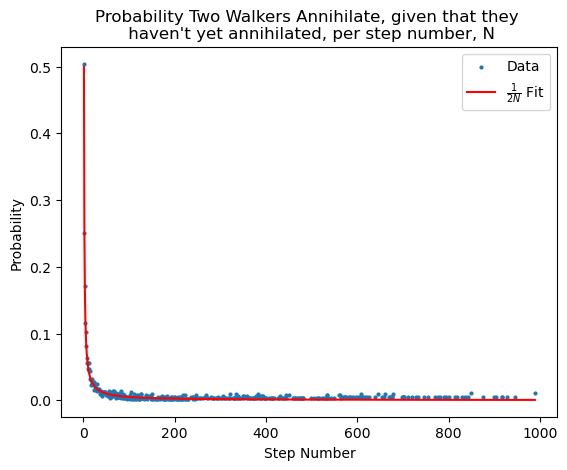

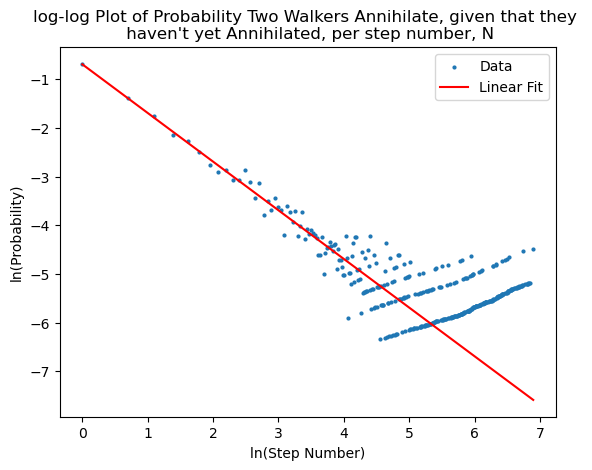

In [26]:
#plot results
plt.figure()
plt.scatter(steps_plot,annihilating_probability, s=4, label='Data')
plt.title('Probability Two Walkers Annihilate, given that they \n haven\'t yet annihilated, per step number, N')
plt.plot(steps_plot,1/(2*np.array(steps_plot)), color='r', label=r'$\frac{1}{2N}$ Fit')
plt.xlabel('Step Number')
plt.ylabel('Probability')
plt.legend()

plt.figure()
plt.scatter(np.log(steps_plot),np.log(annihilating_probability), s=4, label='Data')
plt.plot(np.log(steps_plot),-np.log((2*np.array(steps_plot))), color='r', label='Linear Fit')
plt.title('log-log Plot of Probability Two Walkers Annihilate, given that they \n haven\'t yet Annihilated, per step number, N')
plt.xlabel('ln(Step Number)')
plt.ylabel('ln(Probability)')
plt.legend()

Now we alter the model to add a random walker every step

In [56]:
sim_n = 250
step_n = 1000
starting_walkers_1d = {0:[[0]]} #starting walkers and their positions
adding_walkers = step_n #we are adding a new walker at origin every step

lots_annihilating_walkers = annihilating_walk(sim_n, step_n, vectors_1d, adding_walkers, starting_walkers_1d, dimension_1d)

Loading... 0 of 250
Loading... 1 of 250
Loading... 2 of 250
Loading... 3 of 250
Loading... 4 of 250
Loading... 5 of 250
Loading... 6 of 250
Loading... 7 of 250
Loading... 8 of 250
Loading... 9 of 250
Loading... 10 of 250
Loading... 11 of 250
Loading... 12 of 250
Loading... 13 of 250
Loading... 14 of 250
Loading... 15 of 250
Loading... 16 of 250
Loading... 17 of 250
Loading... 18 of 250
Loading... 19 of 250
Loading... 20 of 250
Loading... 21 of 250
Loading... 22 of 250
Loading... 23 of 250
Loading... 24 of 250
Loading... 25 of 250
Loading... 26 of 250
Loading... 27 of 250
Loading... 28 of 250
Loading... 29 of 250
Loading... 30 of 250
Loading... 31 of 250
Loading... 32 of 250
Loading... 33 of 250
Loading... 34 of 250
Loading... 35 of 250
Loading... 36 of 250
Loading... 37 of 250
Loading... 38 of 250
Loading... 39 of 250
Loading... 40 of 250
Loading... 41 of 250
Loading... 42 of 250
Loading... 43 of 250
Loading... 44 of 250
Loading... 45 of 250
Loading... 46 of 250
Loading... 47 of 250
Lo

Fit : 4.13637425294744x^0.0914489272396278


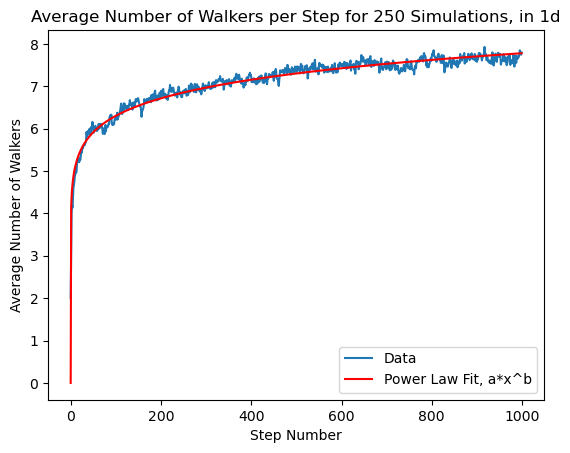

In [57]:
step_array = np.arange(0,step_n) # array of steps
average_walker_numbers = np.mean(lots_annihilating_walkers[0], axis=0) #get mean number of walkers per step

#plot average number of walkers per step
plt.figure()
plt.plot(step_array, average_walker_numbers, label='Data')

def power_law_func(x,a,b):
    '''Function for fitting a power law of form ax^b+c'''
    return a*x**b
#get best fit power law and plot it
params, covariance = curve_fit(power_law_func, step_array, average_walker_numbers,
                               p0=[-15,0.3], bounds=[[-100,0],[100,100]]) #get the best fit parameters
fitted_curve = power_law_func(step_array, *params) #generate power law fit
plt.plot(step_array,fitted_curve,color='r', label='Power Law Fit, a*x^b')
plt.title(f"Average Number of Walkers per Step for {sim_n} Simulations, in 1d") #sublinear growth?
plt.xlabel('Step Number')
plt.ylabel('Average Number of Walkers')
plt.legend()
print(f'Fit : {params[0]}x^{params[1]}')

Linear fit: 0.0877322146038547x + 1.4430049797876858


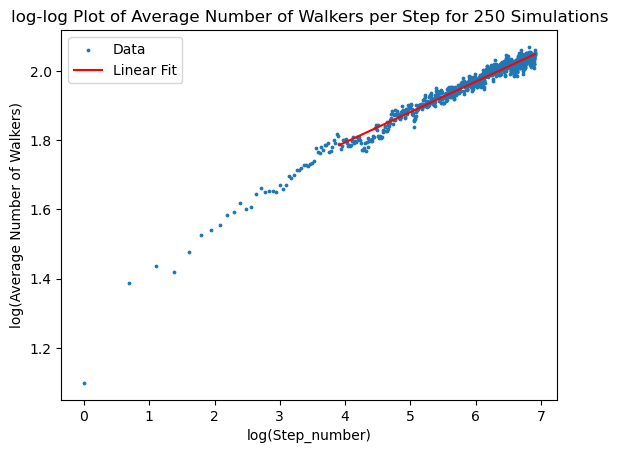

In [58]:
#log-log number of walkers per step

log_walker_nums = np.log(average_walker_numbers) #logged average walkers

#plot data
plt.figure()
plt.scatter(np.log(step_array[1:]),log_walker_nums[1:], s=3, label='Data') #exclude first data point, as np.log(0) is -inf
plt.title(f"log-log Plot of Average Number of Walkers per Step for {sim_n} Simulations")
plt.xlabel('log(Step_number)')
plt.ylabel('log(Average Number of Walkers)')

#fit straight line
def linear_fit(x,a,b):
    '''Function for fitting a straight line of form ax+b'''
    return a*x+b

linear_offset = 50 #fit only straight line segment of data

lin_params, lin_covariance = curve_fit(linear_fit, np.log(step_array[linear_offset:]),
                                       log_walker_nums[linear_offset:]) #generating fit parameters
fitted_linear = linear_fit(np.log(step_array[linear_offset:]), *lin_params) #fitting linear fit to data

plt.plot(np.log(step_array[linear_offset:]),fitted_linear, color='r', label='Linear Fit')
plt.legend()

print(f"Linear fit: {lin_params[0]}x + {lin_params[1]}")

Mean correction after 50 points:  1.0001026787375087
Arctan fit parameter:  1.9132398836053703


<Figure size 640x480 with 0 Axes>

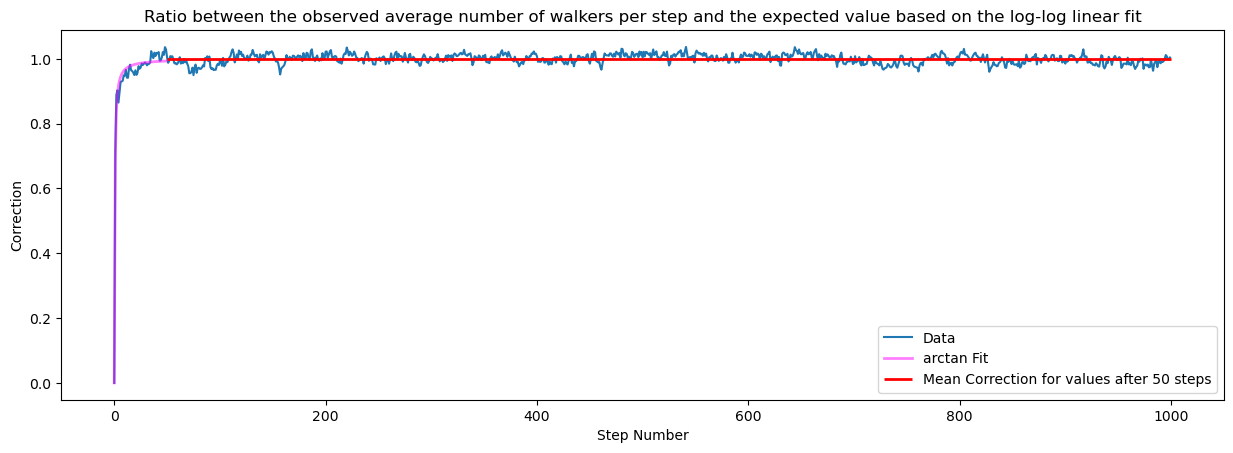

In [59]:
#Calculating the Correction Term
correction = np.divide(average_walker_numbers, ((step_array**lin_params[0])*np.exp(lin_params[1])), where=step_array != 0)

#plot correction
plt.figure()
plt.figure().set_figwidth(15)
plt.plot(correction, label='Data')
plt.title('Ratio between the observed average number of walkers per step and the expected value based on the log-log linear fit')
plt.xlabel('Step Number')
plt.ylabel('Correction')

#check correction is around 1
mean_offset = 50 #ignore first 50 steps as they do not fit log-log fit
print(f'Mean correction after {mean_offset} points: ', np.mean(correction[mean_offset:]))

#visual fit
def arctan_func(x,a):
    '''arctan fit for first part of correction plot'''
    return 2/np.pi*np.arctan(a*x)

cor_params, cor_cov = curve_fit(arctan_func, step_array, correction) #gereate best fit parameters for arctan fit
fitted_arctan = arctan_func(step_array, *cor_params)
plt.plot(step_array[:mean_offset], fitted_arctan[:mean_offset], color='fuchsia', linewidth=2, alpha=0.5, label='arctan Fit') #fit first mean_offset values
plt.hlines(np.mean(correction[mean_offset:]), xmin=mean_offset, xmax=step_n, linewidth=2, color='r', label=f'Mean Correction for values after {mean_offset} steps')
plt.legend()

print('Arctan fit parameter: ', cor_params[0])


(-10.0, 1000.0)

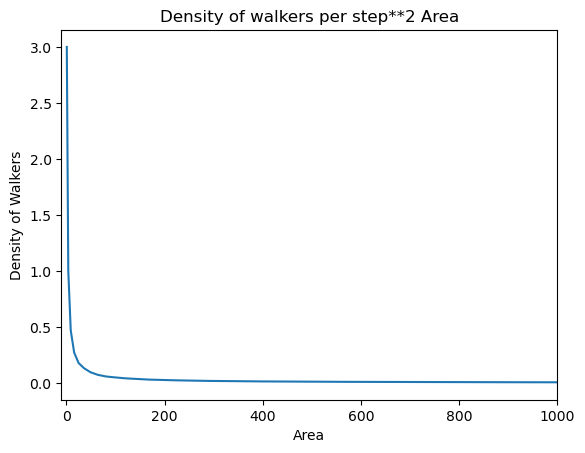

In [31]:
#Density of walkers

walker_density = np.divide(average_walker_numbers, (step_array**2), where=step_array != 0) #calculate density of walkers per step

#plot result
plt.figure()
plt.plot(step_array[1:]**2,walker_density[1:])
plt.title('Density of walkers per step**2 Area')
plt.xlabel('Area')
plt.ylabel('Density of Walkers')
plt.xlim(-10,1000) #to show region where the density drops off the fastest


# Scaling the dimension
Annihilating walks 2d
N.B. this code takes a while to run.

In [32]:
sim_n = 250 #number of simulations
step_n = 1000 #number of steps
starting_walkers_2d = {0:[[0,0]]} #number of starting walkers and their positions
adding_walkers = step_n #we are adding a new walker at origin every step

lots_annihilating_walkers_2d = annihilating_walk(sim_n, step_n, vectors_2d, adding_walkers, starting_walkers_2d, dimension_2d) #generate the walks

Loading... 0 of 250
Loading... 1 of 250
Loading... 2 of 250
Loading... 3 of 250
Loading... 4 of 250
Loading... 5 of 250
Loading... 6 of 250
Loading... 7 of 250
Loading... 8 of 250
Loading... 9 of 250
Loading... 10 of 250
Loading... 11 of 250
Loading... 12 of 250
Loading... 13 of 250
Loading... 14 of 250
Loading... 15 of 250
Loading... 16 of 250
Loading... 17 of 250
Loading... 18 of 250
Loading... 19 of 250
Loading... 20 of 250
Loading... 21 of 250
Loading... 22 of 250
Loading... 23 of 250
Loading... 24 of 250
Loading... 25 of 250
Loading... 26 of 250
Loading... 27 of 250
Loading... 28 of 250
Loading... 29 of 250
Loading... 30 of 250
Loading... 31 of 250
Loading... 32 of 250
Loading... 33 of 250
Loading... 34 of 250
Loading... 35 of 250
Loading... 36 of 250
Loading... 37 of 250
Loading... 38 of 250
Loading... 39 of 250
Loading... 40 of 250
Loading... 41 of 250
Loading... 42 of 250
Loading... 43 of 250
Loading... 44 of 250
Loading... 45 of 250
Loading... 46 of 250
Loading... 47 of 250
Lo

In [33]:
#average number of walkers per step and power law fit
step_array = np.arange(0,step_n) # array of steps
average_walker_numbers_2d = np.mean(lots_annihilating_walkers_2d[0], axis=0)
params_2d, cov_2d = curve_fit(power_law_func, step_array, average_walker_numbers_2d, p0=[-15,0.3], bounds=[[-100,0],[100,100]])
fitted_curve = power_law_func(step_array, *params_2d)
print(f'Power Law Fit : {params_2d[0]}x^{params_2d[1]}')

#loglog number of walkers per step
log_walker_nums_2d = np.log(average_walker_numbers_2d)

linear_offset = 50
#linear fit
lin_params_2d, lin_cov_2d = curve_fit(linear_fit, np.log(step_array[linear_offset:]), log_walker_nums_2d[linear_offset:]) #fitting linear fit to data
fitted_linear = linear_fit(np.log(step_array[linear_offset:]), *lin_params_2d)


print(f"log-log Linear Fit: {lin_params_2d[0]}x + {lin_params_2d[1]}")

#Calculating the Correction Term
correction = np.divide(average_walker_numbers_2d, ((step_array**lin_params_2d[0])*np.exp(lin_params_2d[1])), where=step_array != 0)

mean_offset = 50
print(f'Mean correction after {mean_offset} points: ', np.mean(correction[mean_offset:]))



Power Law Fit : 4.578749958909258x^0.2736317409789645
log-log Linear Fit: 0.2693961263253215x + 1.5487878500498495
Mean correction after 50 points:  1.0000644555495681


Annihilating walks 3d

In [37]:
sim_n = 250 #number of simulations
step_n = 1000 #number of steps taken for each simulation
starting_walkers_3d = {0:[[0,0,0]]} #starting walkers and their positions
adding_walkers = step_n #we are adding a new walker at origin every step

lots_annihilating_walkers_3d = annihilating_walk(sim_n, step_n, vectors_3d, adding_walkers, starting_walkers_3d, dimension_3d) #generate walks

Loading... 0 of 250
Loading... 1 of 250
Loading... 2 of 250
Loading... 3 of 250
Loading... 4 of 250
Loading... 5 of 250
Loading... 6 of 250
Loading... 7 of 250
Loading... 8 of 250
Loading... 9 of 250
Loading... 10 of 250
Loading... 11 of 250
Loading... 12 of 250
Loading... 13 of 250
Loading... 14 of 250
Loading... 15 of 250
Loading... 16 of 250
Loading... 17 of 250
Loading... 18 of 250
Loading... 19 of 250
Loading... 20 of 250
Loading... 21 of 250
Loading... 22 of 250
Loading... 23 of 250
Loading... 24 of 250
Loading... 25 of 250
Loading... 26 of 250
Loading... 27 of 250
Loading... 28 of 250
Loading... 29 of 250
Loading... 30 of 250
Loading... 31 of 250
Loading... 32 of 250
Loading... 33 of 250
Loading... 34 of 250
Loading... 35 of 250
Loading... 36 of 250
Loading... 37 of 250
Loading... 38 of 250
Loading... 39 of 250
Loading... 40 of 250
Loading... 41 of 250
Loading... 42 of 250
Loading... 43 of 250
Loading... 44 of 250
Loading... 45 of 250
Loading... 46 of 250
Loading... 47 of 250
Lo

In [39]:
#average number of walkers per step and power law fit
step_array = np.arange(0,step_n) # array of steps
average_walker_numbers_3d = np.mean(lots_annihilating_walkers_3d[0], axis=0) #average number of steps per 
params_3d, cov_2d = curve_fit(power_law_func, step_array, average_walker_numbers_3d, p0=[-15,0.3], bounds=[[-100,0],[100,100]])
fitted_curve = power_law_func(step_array, *params_3d)

print(f'Power Law Fit : {params_3d[0]}x^{params_3d[1]}')

#loglog number of walkers per step

log_walker_nums_3d = np.log(average_walker_numbers_3d)

linear_offset = 50

lin_params_3d, lin_cov_3d = curve_fit(linear_fit, np.log(step_array[linear_offset:]), log_walker_nums_3d[linear_offset:]) #fitting linear fit to data
fitted_linear = linear_fit(np.log(step_array[linear_offset:]), *lin_params_3d)

print(f"log-log Linear Fit: {lin_params_3d[0]}x + {lin_params_3d[1]}")

#Calculating the Correction Term
correction = np.divide(average_walker_numbers_3d, ((step_array**lin_params_3d[0])*np.exp(lin_params_3d[1])), where=step_array != 0)

mean_offset = 50 #neglecting first
print(f'Mean correction after {mean_offset} points: ', np.mean(correction[mean_offset:]))


Power Law Fit : 2.5781568424938577x^0.5830541230601564
log-log Linear Fit: 0.5840184636479054x + 0.9412168922631494
Mean correction after 50 points:  1.000007880827137


Annihilating walks 4d - this takes about 20 minutes to run

In [40]:
sim_n = 250 #number of simulations
step_n = 1000 #number of steps taken for each simulation
starting_walkers_4d = {0:[[0,0,0,0]]} #starting walkers and their positions
adding_walkers = step_n #we are adding a new walker at origin every step

lots_annihilating_walkers_4d = annihilating_walk(sim_n, step_n, vectors_4d, adding_walkers, starting_walkers_4d, dimension_4d) #generate walks

Loading... 0 of 250
Loading... 1 of 250
Loading... 2 of 250
Loading... 3 of 250
Loading... 4 of 250
Loading... 5 of 250
Loading... 6 of 250
Loading... 7 of 250
Loading... 8 of 250
Loading... 9 of 250
Loading... 10 of 250
Loading... 11 of 250
Loading... 12 of 250
Loading... 13 of 250
Loading... 14 of 250
Loading... 15 of 250
Loading... 16 of 250
Loading... 17 of 250
Loading... 18 of 250
Loading... 19 of 250
Loading... 20 of 250
Loading... 21 of 250
Loading... 22 of 250
Loading... 23 of 250
Loading... 24 of 250
Loading... 25 of 250
Loading... 26 of 250
Loading... 27 of 250
Loading... 28 of 250
Loading... 29 of 250
Loading... 30 of 250
Loading... 31 of 250
Loading... 32 of 250
Loading... 33 of 250
Loading... 34 of 250
Loading... 35 of 250
Loading... 36 of 250
Loading... 37 of 250
Loading... 38 of 250
Loading... 39 of 250
Loading... 40 of 250
Loading... 41 of 250
Loading... 42 of 250
Loading... 43 of 250
Loading... 44 of 250
Loading... 45 of 250
Loading... 46 of 250
Loading... 47 of 250
Lo

In [41]:
#average number of walkers per step and power law fit
step_array = np.arange(0,step_n) # array of steps
average_walker_numbers_4d = np.mean(lots_annihilating_walkers_4d[0], axis=0) #average number of steps per 
params_4d, cov_4d = curve_fit(power_law_func, step_array, average_walker_numbers_4d, p0=[-15,0.3], bounds=[[-100,0],[100,100]])
fitted_curve = power_law_func(step_array, *params_4d)

print(f'Power Law Fit : {params_4d[0]}x^{params_4d[1]}')

#loglog number of walkers per step

log_walker_nums_4d = np.log(average_walker_numbers_4d)

linear_offset = 50

lin_params_4d, lin_cov_4d = curve_fit(linear_fit, np.log(step_array[linear_offset:]), log_walker_nums_4d[linear_offset:]) #fitting linear fit to data
fitted_linear = linear_fit(np.log(step_array[linear_offset:]), *lin_params_4d)

print(f"log-log Linear Fit: {lin_params_4d[0]}x + {lin_params_4d[1]}")

Power Law Fit : 1.1545426889663173x^0.8675842293990434
log-log Linear Fit: 0.8565694694173663x + 0.2133677568945029
